In [18]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

In [19]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __str__(self) -> str:
        return str(self.x) + ' ' + str(self.y)

In [20]:
def yAxisCollision(slope: float, point: Point)->float:
    return point.y - slope * point.x

def toGradient(slope: float)->float:
    return math.tan(slope * math.pi / 180)

def getCollisionPoint(slope: float, vslope: float, y0: float)->Point:
    x = y0 / (slope - vslope)
    y = slope * x
    return Point(x, y)

def getMirroredPointDisToCenter(slope: float, point: Point)->float:
    slope = toGradient(slope)
    vslope = -1/slope
    y0 = yAxisCollision(vslope, point)
    vpoint = getCollisionPoint(slope, vslope, y0)
    return math.sqrt(vpoint.x * vpoint.x + vpoint.y * vpoint.y)

def fitLine(lst: list[Point])->float:
    slope = 0.1
    bestSlope = 0.0
    bestDisSum = -math.inf
    while slope <= 90:
        disSum = sum([getMirroredPointDisToCenter(slope, point) for point in lst])
        if disSum > bestDisSum:
            bestDisSum = disSum
            bestSlope = slope
        slope += 0.01
    return bestSlope

def optimize(lst: list[Point]):
    mx = math.inf
    my = math.inf
    for point in lst:
        mx = min(mx, point.x)
        my = min(my, point.y)
    for i in range(len(lst)):
        lst[i].x -= mx
        lst[i].y -= my

In [39]:
def loadData()->list[Point]:
    points = list()
    with open('lnrg.csv', 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for line in csvreader:
            print(line, type(line))
            points += [Point(float(line[0]), float(line[1]))]
    return points

def plot(gradient: float, lst: list[Point]):
    xpoints = np.array([point.x for point in lst])
    ypoints = np.array([point.y for point in lst])

    print(ypoints)

    x = np.linspace(-1, 60)
    y = math.tan(gradient * math.pi / 180)*x
    plt.plot(x, y, color='black')

    plt.scatter(xpoints, ypoints)
    plt.show()

['1', '3.888888889'] <class 'list'>
['2', '4.555555556'] <class 'list'>
['3', '5.222222222'] <class 'list'>
['4', '5.888888889'] <class 'list'>
['5', '6.555555556'] <class 'list'>
['6', '7.222222222'] <class 'list'>
['7', '7.888888889'] <class 'list'>
['8', '8.555555556'] <class 'list'>
['9', '9.222222222'] <class 'list'>
['10', '9.888888889'] <class 'list'>
['11', '10.55555556'] <class 'list'>
['12', '11.22222222'] <class 'list'>
['13', '11.88888889'] <class 'list'>
['14', '12.55555556'] <class 'list'>
['15', '13.22222222'] <class 'list'>
['16', '13.88888889'] <class 'list'>
['17', '14.55555556'] <class 'list'>
['18', '15.22222222'] <class 'list'>
['19', '15.88888889'] <class 'list'>
['20', '16.55555556'] <class 'list'>
['21', '17.22222222'] <class 'list'>
['22', '17.88888889'] <class 'list'>
['23', '18.55555556'] <class 'list'>
['24', '19.22222222'] <class 'list'>
['25', '19.88888889'] <class 'list'>
['26', '20.55555556'] <class 'list'>
['27', '21.22222222'] <class 'list'>
['28', '21

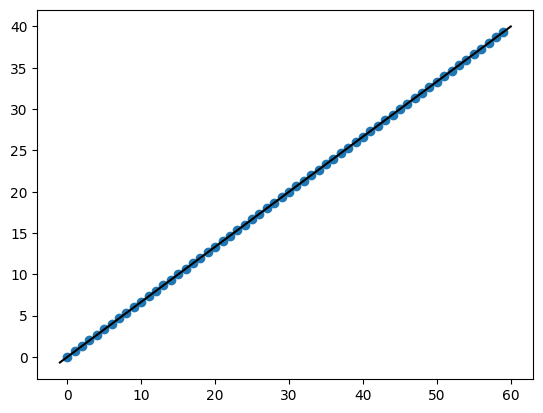

In [40]:
if __name__ == "__main__":
    points = loadData()
    optimize(points)
    gradient = fitLine(points)
    print('degrees:', gradient)
    plot(gradient, points)
    